**Final Project**

 Deep Learning 1

 Data Science for Business Masters Program (2024)

 Anahit Petrosyan Gevorg


In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
import math
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [192]:
df= pd.read_csv("...Customer_Churn.csv")


# **1. Data pre-processing**



### **Dataset at a glance**

In [193]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [195]:
 df['customerID'].nunique()

7043

Dataset has 21 features and there are 7043 customers.

In [196]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [197]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [198]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [199]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 '

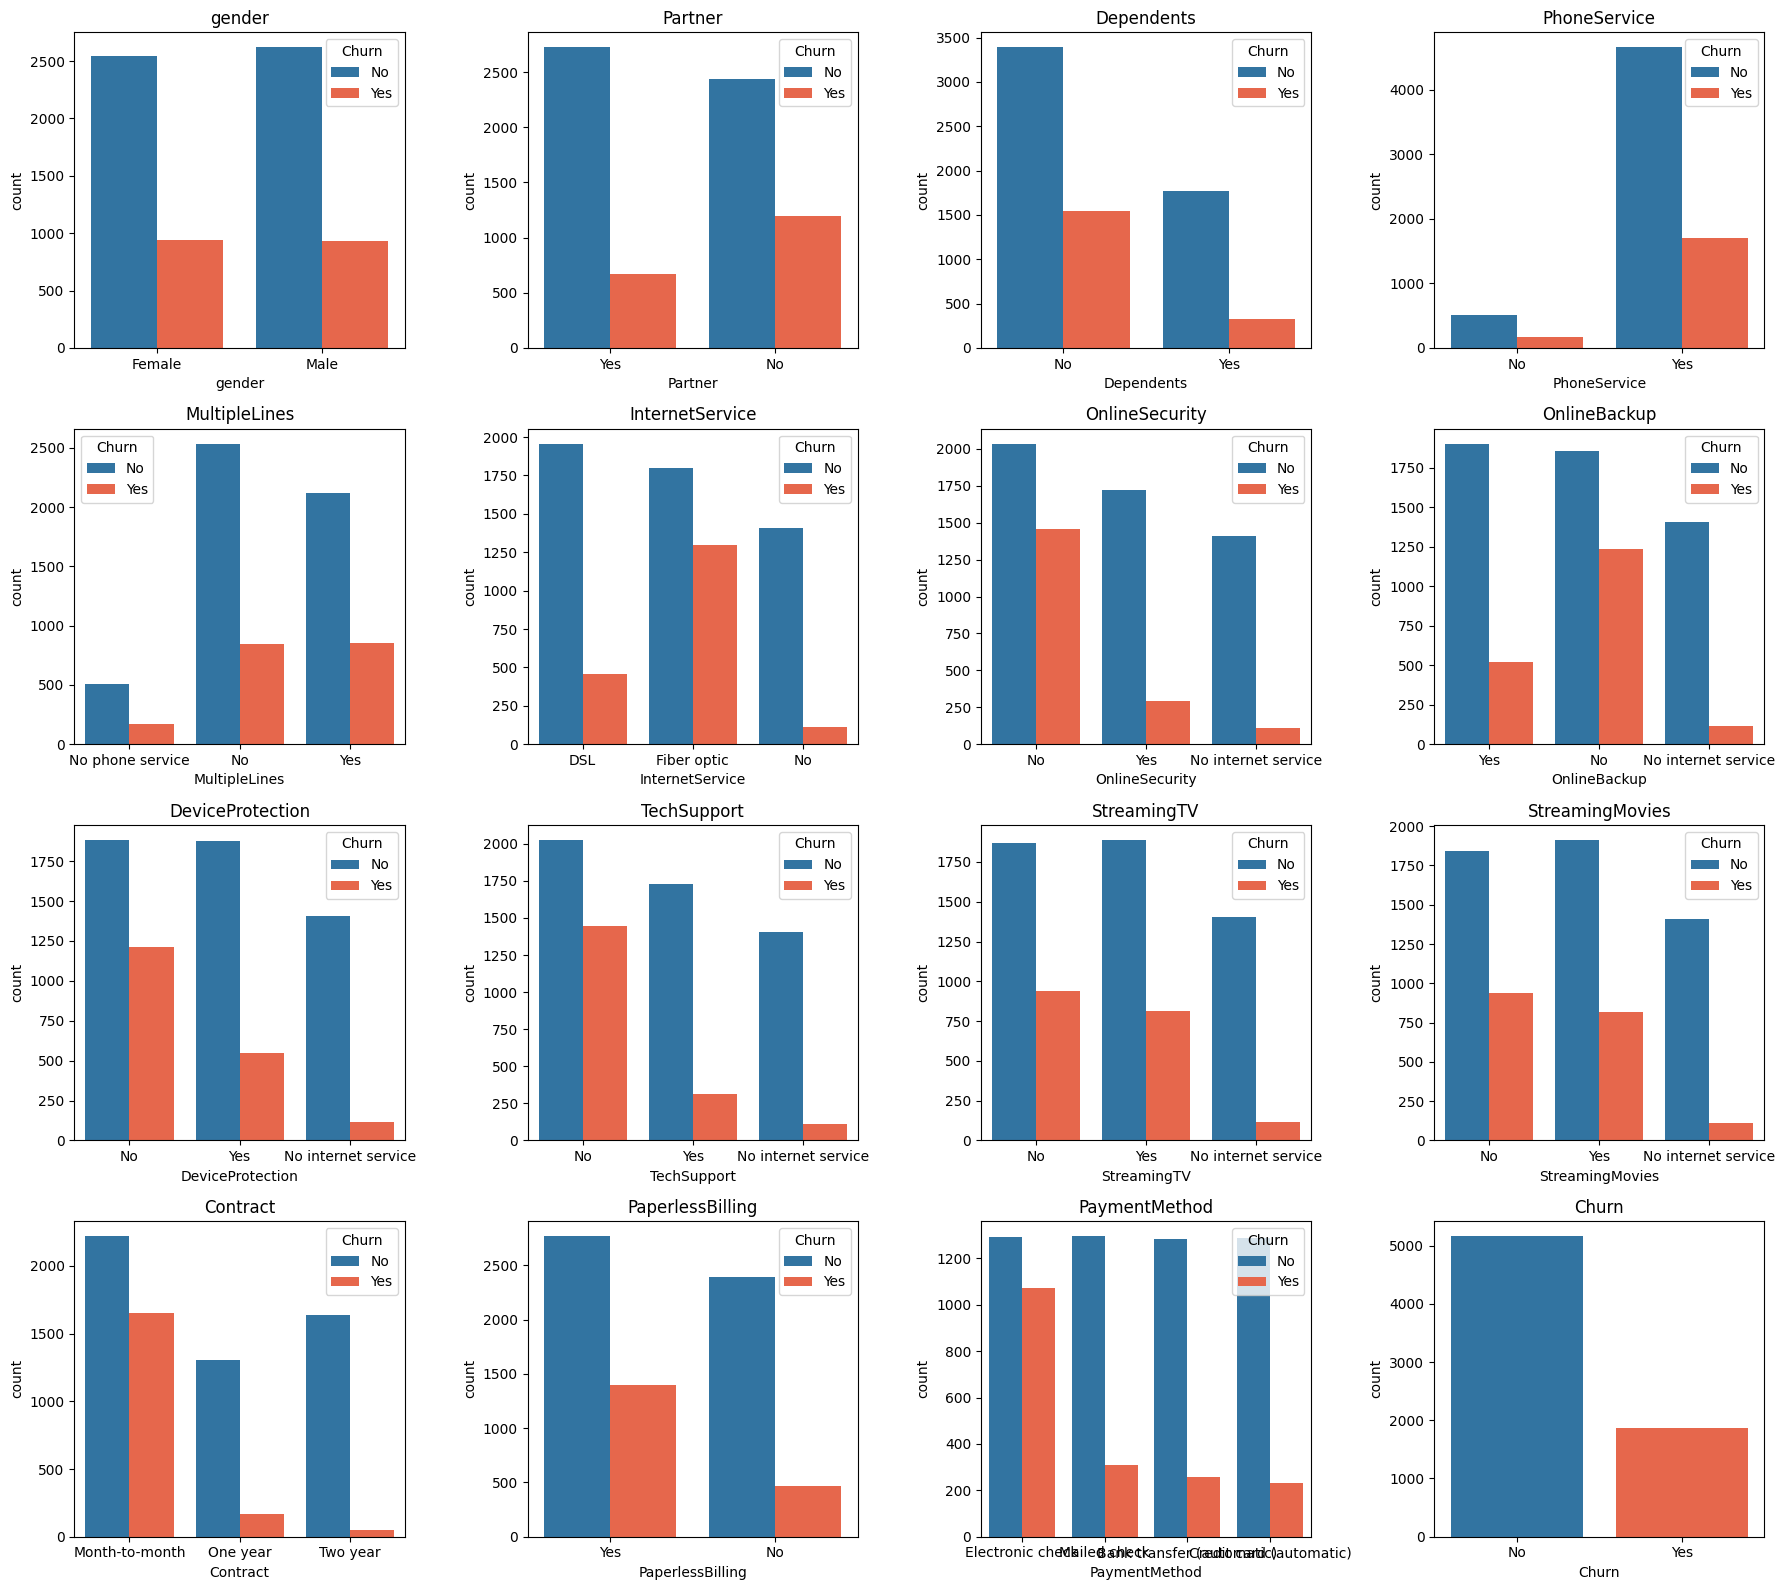

In [200]:
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]
num_cols = 4
num_rows = math.ceil(len(categorical_cols) / num_cols)

plt.figure(figsize=(18, num_rows * 4))
custom_palette = {'No': '#1f77b4', 'Yes': '#FF5733'}
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=column, hue='Churn', data=df, palette=custom_palette)

    plt.title(f'{column}')
plt.tight_layout()
plt.show()

Conclusions from the following bar plot shown above:

*   The proportion of churn is an imbalanced
*   There are no differences for each gender.
*   There is higher churn rate for customers who has the phone service.
*   Customers are more likely to churn with month-to-month contracts.
*   Moderately higher churn rate with electronic check payment method.
*   Customers with paperless billing have higher churn rates

In [201]:
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)

In [202]:
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'], drop_first=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  MultipleL

In [175]:
df.isnull().sum()

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV

### **Split the data into train, validation and test sets**




In [ ]:
X = df.drop(['customerID', 'Churn'], axis=1).values
y = df['Churn'].values

In [176]:
 # 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 80% train / 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [177]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4500, 30)
y_train shape: (4500,)
X_val shape: (1125, 30)
y_val shape: (1125,)
X_test shape: (1407, 30)
y_test shape: (1407,)


**Final split:**

Training: 64%

Validation: 16%

Testing: 20%

In [178]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  MultipleL

# **Model 1 Building**

**Architecture1:**

**Input layer:** 30 input features to 64 hidden units.

**Hidden layer 1:** 64 hidden units to 32 hidden units.

**Output layer:** 32 hidden units to 1 output unit (for binary classification).

**Dropout layer:** Applies dropout with probability 0.5 during training to reduce overfitting.

**Batch normalization layers:** Normalize activations of previous layers for stable training.

**Batch size** 32, number of data points processed by the model at a time during training

**Activation function:** ReLU (All Hidden Layers), Sigmoid (Output Layer)

**Loss function:** Binary Cross-Entropy Loss

**Optimizer:** Adagrad with learning rate 0.5

In [180]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Convert data to tensors**

In [181]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [182]:
X_train.shape

torch.Size([4500, 30])

In [ ]:
y_train.shape

torch.Size([4500, 1])

In [183]:
class ChurnPredictionModel(nn.Module):
    def __init__(self):
        super(ChurnPredictionModel, self).__init__()
        self.fc1 = nn.Linear(30, 64) # A linear layer with 30 input features and 64 output features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(64) # Batch normalization layer with 64 input features, it reduces overfitting by randomly setting a fraction of the input units to 0 during training.
        self.batch_norm2 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = torch.relu(self.batch_norm1(self.fc1(x))) # ReLU activation function
        x = self.dropout(x)
        x = torch.relu(self.batch_norm2(self.fc2(x)))
        x = torch.sigmoid(self.fc3(x)) # The sigmoid activation function.
        return x

In [184]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

<ipython-input-184-5be1393a3a00>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-184-5be1393a3a00>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
<ipython-input-184-5be1393a3a00>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_val = torch.tensor(X_val, dtype=torch.float32)
<ipython-input-184-5be1393a3a00>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().det

**Train the Model**

Epoch 1/16, Training Loss: 0.4825, Validation Loss: 0.4564
Epoch 2/16, Training Loss: 0.4388, Validation Loss: 0.4184
Epoch 3/16, Training Loss: 0.4398, Validation Loss: 0.4145
Epoch 4/16, Training Loss: 0.4313, Validation Loss: 0.4188
Epoch 5/16, Training Loss: 0.4259, Validation Loss: 0.4157
Epoch 6/16, Training Loss: 0.4277, Validation Loss: 0.4149
Epoch 7/16, Training Loss: 0.4331, Validation Loss: 0.4222
Epoch 8/16, Training Loss: 0.4245, Validation Loss: 0.4199
Epoch 9/16, Training Loss: 0.4226, Validation Loss: 0.4126
Epoch 10/16, Training Loss: 0.4268, Validation Loss: 0.4167
Epoch 11/16, Training Loss: 0.4254, Validation Loss: 0.4110
Epoch 12/16, Training Loss: 0.4258, Validation Loss: 0.4143
Epoch 13/16, Training Loss: 0.4193, Validation Loss: 0.4146
Epoch 14/16, Training Loss: 0.4217, Validation Loss: 0.4152
Epoch 15/16, Training Loss: 0.4260, Validation Loss: 0.4144
Epoch 16/16, Training Loss: 0.4217, Validation Loss: 0.4174


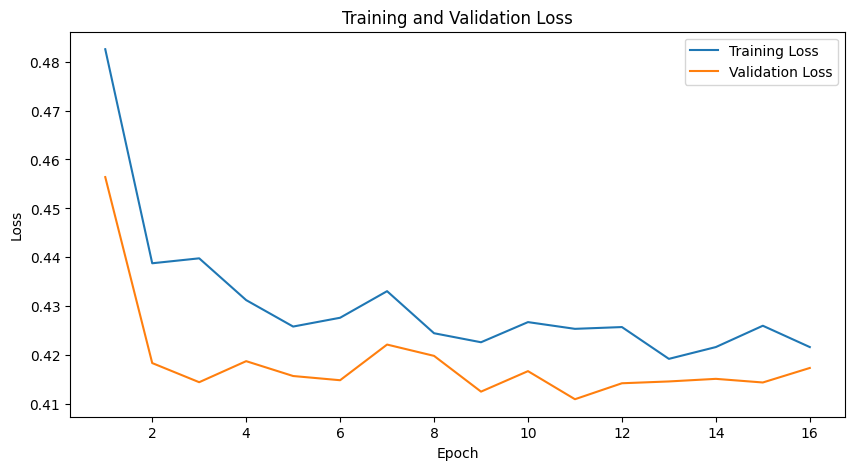

Best Epoch: 11
Best Validation Loss: 0.4110
Accuracy: 0.8053
Precision: 0.6522
Recall: 0.5941
F1-score: 0.6218


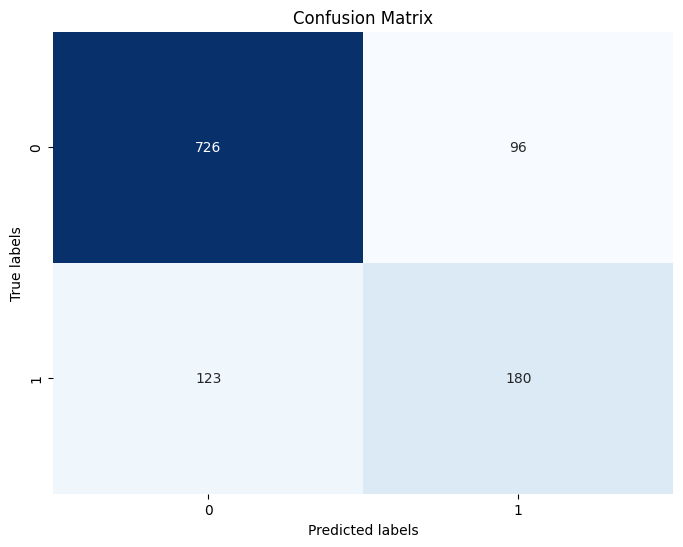

In [185]:
model = ChurnPredictionModel()
criterion = nn.BCELoss() # Binary Cross-Entropy Loss
optimizer = optim.Adagrad(model.parameters(), lr=0.5)
n_epochs = 16
best_val_loss = float('inf')
best_model_state = None
train_losses = []
val_losses = []
for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad() # Reset gradients
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()  # Update weights
        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    train_loss /= len(train_loader)   # Compute the average loss for the epoch
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{n_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        best_model_state = model.state_dict()

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print(f'Best Epoch: {best_epoch}')
print(f'Best Validation Loss: {best_val_loss:.4f}')
model.load_state_dict(best_model_state)
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        y_true.extend(y_batch.numpy())
        y_pred.extend((model(X_batch) > 0.5).numpy().astype(int))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Model 2 Building**

**Architecture2:**

**Input layer:** 30 input features to 32 hidden units.

**Hidden layer 1:**  32 hidden units to 128 hidden units.

**Hidden layer 2:**  128 hidden units to 64 hidden units.

**Hidden layer 3:**  64 hidden units to 32 hidden units.

**Output layer:** 32 hidden units to 1 output unit (for binary classification).

**Dropout layer:** Applies dropout with probability 0.5 during training to reduce overfitting.

**Batch normalization layers:** Normalize activations of previous layers for stable training.

**Batch size** 32, number of data points processed by the model at a time during training

**Activation function:** ReLU (All Hidden Layers), Sigmoid (Output Layer

**Loss function:** Binary Cross-Entropy Loss

**Optimizer:** Stochastic gradient descent with learning rate 0.1 and momentum 0.9

In [186]:
class ChurnPredictionModel2(nn.Module):
    def __init__(self):
        super(ChurnPredictionModel2, self).__init__()
        self.fc1 = nn.Linear(30, 32)
        self.fc2 = nn.Linear(32, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.batch_norm3 = nn.BatchNorm1d(64)
        self.batch_norm4 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = F.relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.batch_norm2(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.batch_norm3(self.fc3(x)))
        x = self.dropout(x)
        x = F.relu(self.batch_norm4(self.fc4(x)))
        x = F.sigmoid(self.fc5(x))
        return x


Epoch 1/32, Training Loss: 0.5201, Validation Loss: 0.4520
Epoch 2/32, Training Loss: 0.4771, Validation Loss: 0.4404
Epoch 3/32, Training Loss: 0.4625, Validation Loss: 0.4308
Epoch 4/32, Training Loss: 0.4557, Validation Loss: 0.4426
Epoch 5/32, Training Loss: 0.4601, Validation Loss: 0.4308
Epoch 6/32, Training Loss: 0.4497, Validation Loss: 0.4368
Epoch 7/32, Training Loss: 0.4534, Validation Loss: 0.4272
Epoch 8/32, Training Loss: 0.4488, Validation Loss: 0.4247
Epoch 9/32, Training Loss: 0.4491, Validation Loss: 0.4289
Epoch 10/32, Training Loss: 0.4477, Validation Loss: 0.4347
Epoch 11/32, Training Loss: 0.4467, Validation Loss: 0.4588
Epoch 12/32, Training Loss: 0.4373, Validation Loss: 0.4172
Epoch 13/32, Training Loss: 0.4492, Validation Loss: 0.4345
Epoch 14/32, Training Loss: 0.4426, Validation Loss: 0.4288
Epoch 15/32, Training Loss: 0.4395, Validation Loss: 0.4501
Epoch 16/32, Training Loss: 0.4460, Validation Loss: 0.4321
Epoch 17/32, Training Loss: 0.4371, Validation Lo

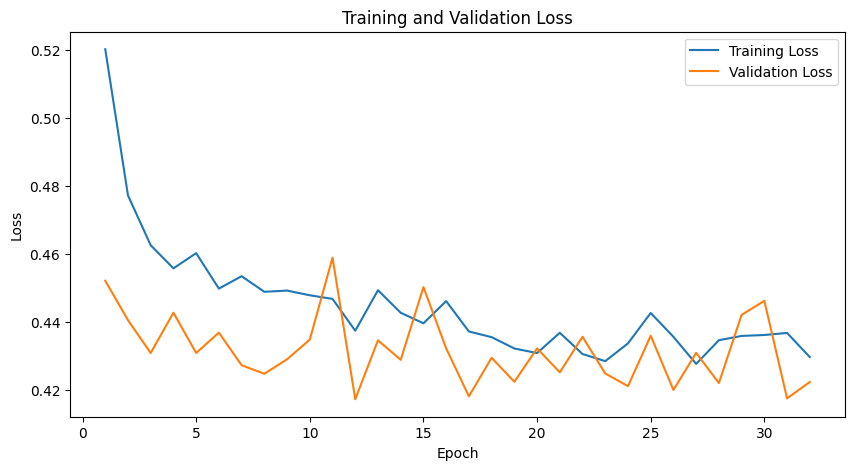

Best Epoch: 12
Best Validation Loss: 0.4172
Accuracy: 0.7973
Precision: 0.6569
Recall: 0.5182
F1-score: 0.5793


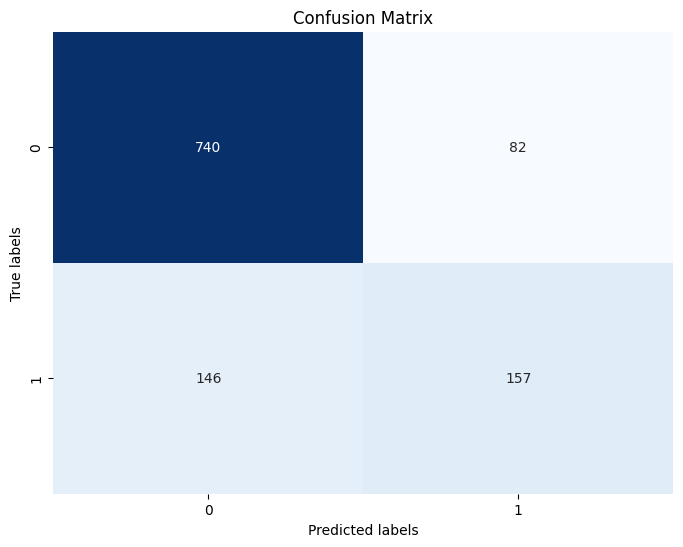

In [187]:
model = ChurnPredictionModel2()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
n_epochs = 32
best_val_loss = float('inf')
best_model_state = None
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    train_loss /= len(train_loader)   # Compute the average loss for the epoch
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{n_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        best_model_state = model.state_dict()


plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


print(f'Best Epoch: {best_epoch}')
print(f'Best Validation Loss: {best_val_loss:.4f}')

model.load_state_dict(best_model_state)
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        y_true.extend(y_batch.numpy())
        y_pred.extend((model(X_batch) > 0.5).numpy().astype(int))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Model 3 Building**

**Architecture3:**

**Input layer:** 30 input features to 32 hidden units.

**Hidden layer 1:**  32 hidden units to 128 hidden units.

**Hidden layer 2:**  128 hidden units to 64 hidden units.

**Hidden layer 3:**  64 hidden units to 32 hidden units.

**Output layer:** 32 hidden units to 1 output unit (for binary classification).

**Dropout layer:** Applies dropout with probability **0.3** during training to reduce overfitting.

**Batch normalization layers:** Normalize activations of previous layers for stable training.

**Batch size** 32, number of data points processed by the model at a time during training

**Loss function:** Binary Cross-Entropy Loss

**Activation function:** F.tanh() (hyperbolic tangent) used before each batch normalization layer.

**Optimizer:** Adam with learning rate  0.01

In [188]:
class ChurnPredictionModel3(nn.Module):
    def __init__(self):
        super(ChurnPredictionModel3, self).__init__()
        self.fc1 = nn.Linear(30, 32)
        self.fc2 = nn.Linear(32, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.batch_norm2 = nn.BatchNorm1d(128)
        self.batch_norm3 = nn.BatchNorm1d(64)
        self.batch_norm4 = nn.BatchNorm1d(32)

    def forward(self, x):
        x = F.tanh(self.batch_norm1(self.fc1(x)))
        x = self.dropout(x)
        x = F.tanh(self.batch_norm2(self.fc2(x)))
        x = self.dropout(x)
        x = F.tanh(self.batch_norm3(self.fc3(x)))
        x = self.dropout(x)
        x = F.tanh(self.batch_norm4(self.fc4(x)))
        x = F.sigmoid(self.fc5(x))
        return x

Epoch 1/32, Training Loss: 0.5934, Validation Loss: 0.5151
Epoch 2/32, Training Loss: 0.5008, Validation Loss: 0.4549
Epoch 3/32, Training Loss: 0.4511, Validation Loss: 0.4347
Epoch 4/32, Training Loss: 0.4395, Validation Loss: 0.4242
Epoch 5/32, Training Loss: 0.4450, Validation Loss: 0.4237
Epoch 6/32, Training Loss: 0.4376, Validation Loss: 0.4213
Epoch 7/32, Training Loss: 0.4343, Validation Loss: 0.4179
Epoch 8/32, Training Loss: 0.4304, Validation Loss: 0.4179
Epoch 9/32, Training Loss: 0.4316, Validation Loss: 0.4206
Epoch 10/32, Training Loss: 0.4268, Validation Loss: 0.4176
Epoch 11/32, Training Loss: 0.4315, Validation Loss: 0.4229
Epoch 12/32, Training Loss: 0.4247, Validation Loss: 0.4184
Epoch 13/32, Training Loss: 0.4271, Validation Loss: 0.4191
Epoch 14/32, Training Loss: 0.4286, Validation Loss: 0.4213
Epoch 15/32, Training Loss: 0.4265, Validation Loss: 0.4230
Epoch 16/32, Training Loss: 0.4238, Validation Loss: 0.4186
Epoch 17/32, Training Loss: 0.4202, Validation Lo

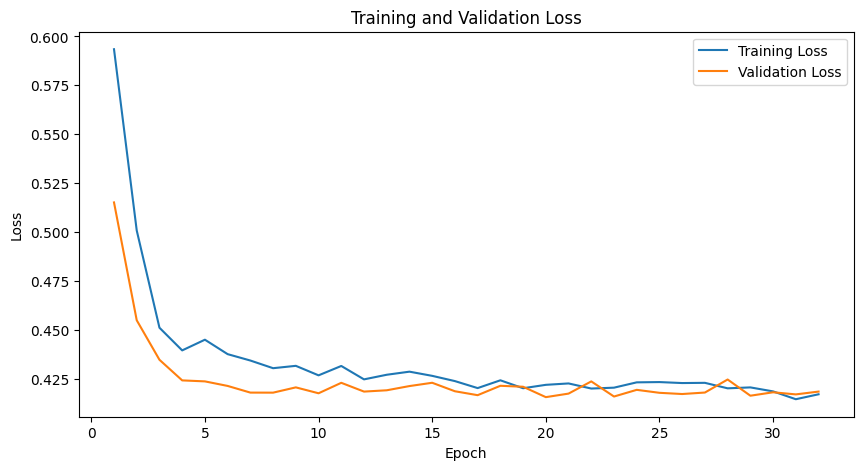

Best Epoch: 20
Best Validation Loss: 0.4156
Accuracy: 0.7938
Precision: 0.6537
Recall: 0.4983
F1-score: 0.5655


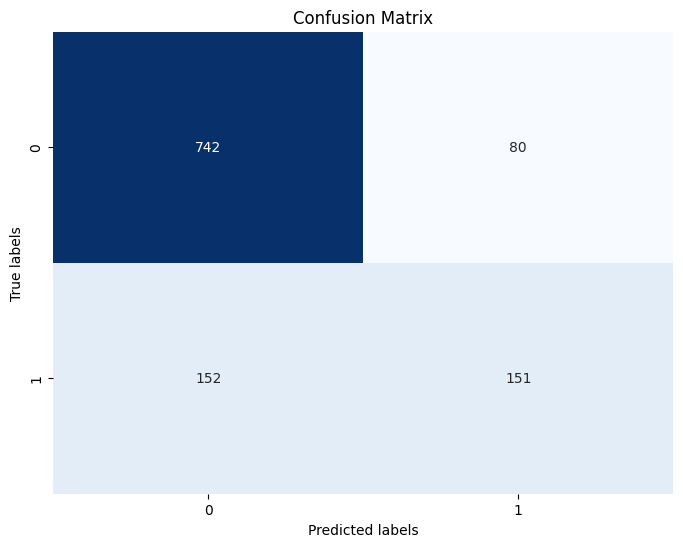

In [189]:
model = ChurnPredictionModel3()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer
n_epochs = 32
best_val_loss = float('inf')
best_model_state = None
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()

        optimizer.step()

        train_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            val_loss += loss.item()

    train_loss /= len(train_loader)   # Compute the average loss for the epoch
    val_loss /= len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{n_epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')


    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_epoch = epoch + 1
        best_model_state = model.state_dict()


plt.figure(figsize=(10, 5))
plt.plot(range(1, n_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


print(f'Best Epoch: {best_epoch}')
print(f'Best Validation Loss: {best_val_loss:.4f}')

model.load_state_dict(best_model_state)
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        y_true.extend(y_batch.numpy())
        y_pred.extend((model(X_batch) > 0.5).numpy().astype(int))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Evaluate the best performing model on the test set**

Accuracy: 0.7946
Precision: 0.6502
Recall: 0.4920
F1-score: 0.5601


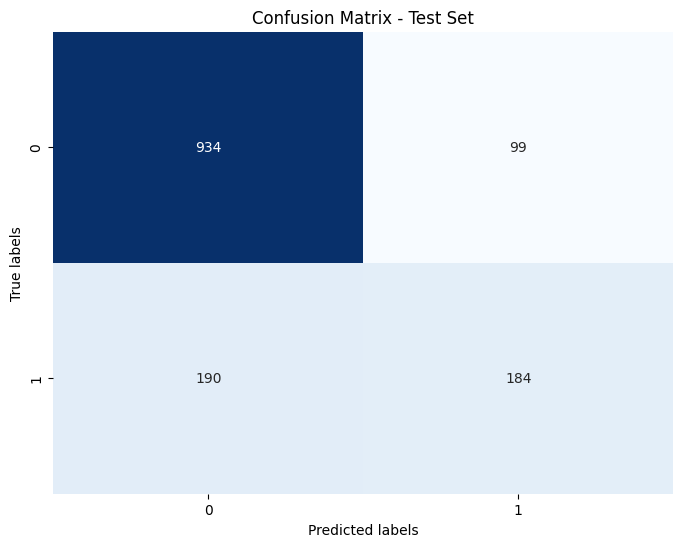

In [203]:
model.load_state_dict(best_model_state)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predicted = (outputs > 0.5).float()
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Set')
plt.show()